In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

# evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [2]:
# load datasets
train_proc=pd.read_csv("train_proc.csv")
test_proc = pd.read_csv("test_proc.csv")

In [3]:
# splitting from training and validation data
X = train_proc.drop("Survived", axis =1)
y = train_proc['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,-0.551881,1,0,-0.726134,False,True,True,False,True,False,True,False,False
1,0.768879,1,0,2.353815,False,False,False,False,False,False,False,True,False
2,-0.221691,0,0,-0.693667,False,True,False,False,True,True,False,False,False
3,0.521236,1,0,1.479214,False,False,False,False,True,False,False,True,False
4,0.521236,0,0,-0.687655,False,True,True,False,True,False,True,False,False


In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
# applying Gaussian Naive Bayes algorithm
model = GaussianNB(var_smoothing=1e-9)
model.fit(X_train, y_train.values.ravel())
model.score(X_train,y_train)

0.7951807228915663

In [7]:
# cross validation score with random shuffling
kf=KFold(5, shuffle=True, random_state=9) #for shuffling
cross_val_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kf)
print(cross_val_results)
print(cross_val_results.mean())

[0.78195489 0.7443609  0.81203008 0.80451128 0.8030303 ]
0.789177489177489


In [8]:
# predictions on validation set and accuracy
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7904191616766467


In [9]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
confusion_matrix(y_test,predictions)

array([[86, 17],
       [18, 46]], dtype=int64)

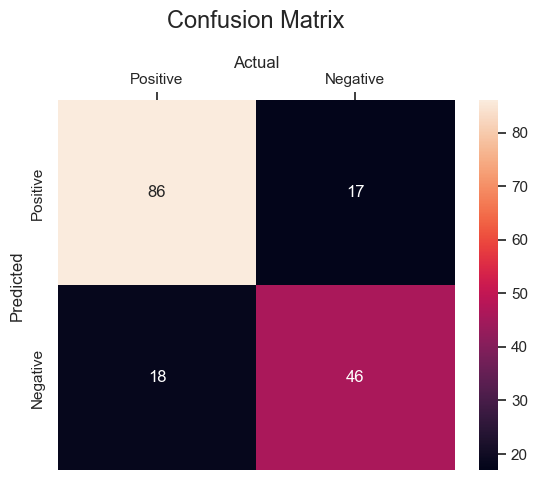

In [10]:
sns.heatmap(cm, 
            annot=True,
            fmt="d", 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Predicted')
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.xlabel('Actual')
plt.show()

In [11]:
# roc-auc curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,threshold=roc_curve(y_test,y_pred_prob)
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(roc_auc_dt)

0.8356341019417477


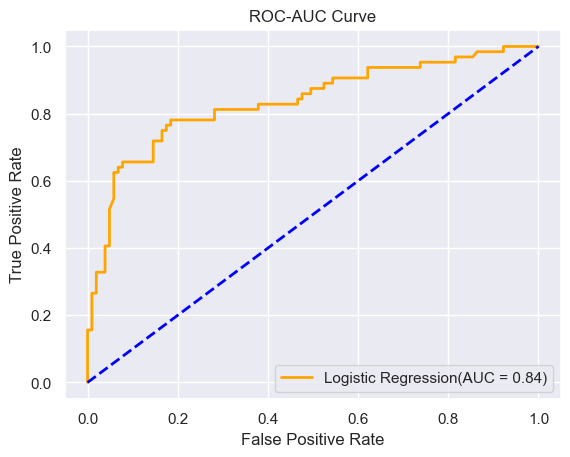

In [12]:
plt.figure()
plt.plot(fpr_dt,tpr_dt,color='orange',lw=2,label=f'Logistic Regression(AUC = {roc_auc_dt:.2f})')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')

In [13]:
# classification_report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.73      0.72      0.72        64

    accuracy                           0.79       167
   macro avg       0.78      0.78      0.78       167
weighted avg       0.79      0.79      0.79       167



In [14]:
# predictions on test data
predictions = model.predict(test_proc)

# creating dataframe of test predictions with Passenger Id, uncomment after loading test file with Passenger Id
# prediction_df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})

# Save the predictions to a CSV file, uncomment to save file
# prediction_df.to_csv('prediction.csv', index=False)